<a href="https://colab.research.google.com/github/krishnaaxo/Drug_Discovery_AI/blob/main/Lazy_predict_Compare_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2. Load the data set**


In [3]:
! wget https://raw.githubusercontent.com/krishnaaxo/Drug_Discovery_AI/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-06-17 10:18:15--  https://raw.githubusercontent.com/krishnaaxo/Drug_Discovery_AI/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.2’

acetylcholinesteras 100%[===================>]   7.98M  32.7MB/s    in 0.2s    

2021-06-17 10:18:16 (32.7 MB/s) - ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.2’ saved [8363909/8363909]



In [4]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(4695, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:

X_test.shape, Y_test.shape

((939, 137), (939,))

In [10]:

X_train.shape, Y_train.shape

((3756, 137), (3756,))

## **4. Compare ML algorithms**

In [11]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 273541.57it/s]


In [12]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.86,0.86,0.57,5.93
DecisionTreeRegressor,0.86,0.86,0.57,0.15
ExtraTreeRegressor,0.86,0.86,0.57,0.14
GaussianProcessRegressor,0.86,0.86,0.57,4.65
RandomForestRegressor,0.82,0.83,0.64,4.60
XGBRegressor,0.82,0.83,0.65,2.07
BaggingRegressor,0.80,0.81,0.67,0.59
MLPRegressor,0.76,0.77,0.75,6.27
HistGradientBoostingRegressor,0.67,0.69,0.87,2.92


In [13]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **5. Data visualization of model performance**

[(0.0, 1.0)]

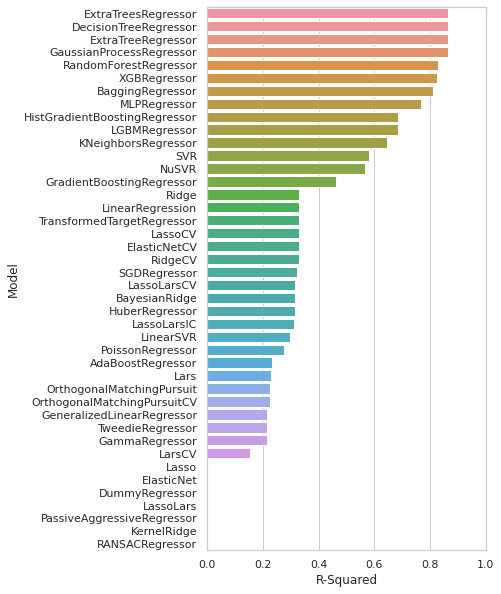

In [14]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

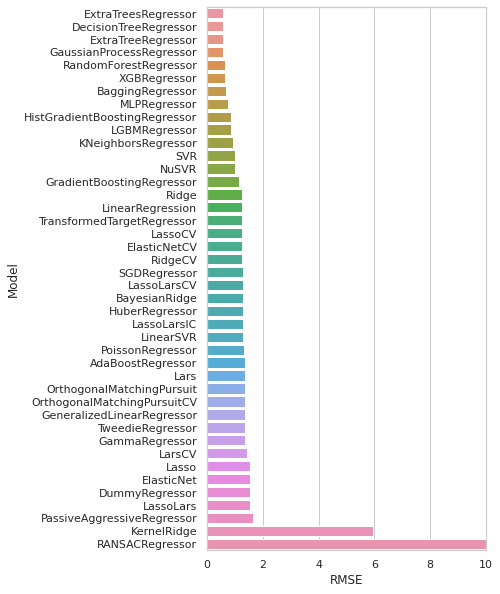

In [15]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

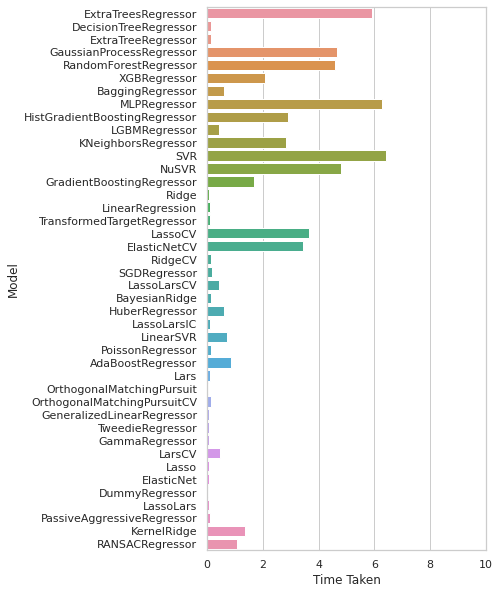

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))